In [1]:
import tensorflow as tf

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [6]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [7]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [9]:
num_train_example = metadata.splits['train'].num_examples
num_test_example = metadata.splits['test'].num_examples
print('training example:{}'.format(num_train_example))
print('testing example:{}'.format(num_test_example))

training example:60000
testing example:10000


In [12]:
def normalize(images,labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

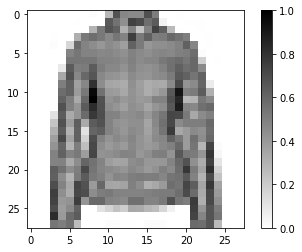

In [17]:
for image, labels in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
    
    

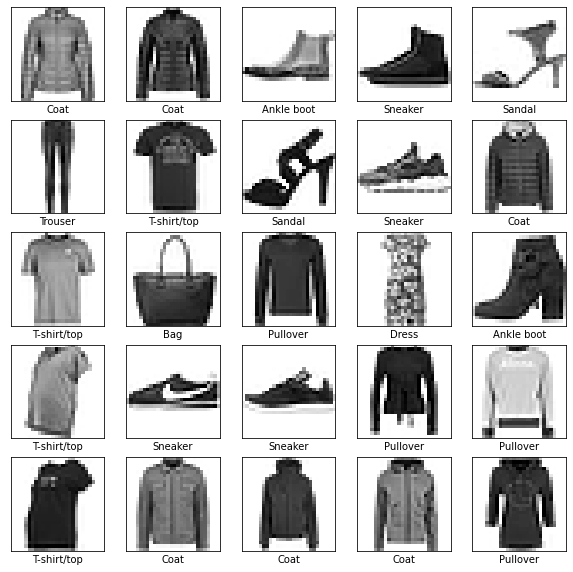

In [18]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [24]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [26]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_example).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [27]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_example/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 38s 19ms/step - loss: 0.3998 - accuracy: 0.8546
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2578 - accuracy: 0.9058
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2151 - accuracy: 0.9219
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1852 - accuracy: 0.9319
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1573 - accuracy: 0.9413
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1320 - accuracy: 0.9509
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1130 - accuracy: 0.9573
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0947 - accuracy: 0.9648
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0806 - accuracy: 0.9705
Epoch 10/10
1875/1875 [==============================] - 37s 20m

In [29]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_example/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3014 - accuracy: 0.9182
Accuracy on test dataset: 0.9182000160217285


In [30]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [31]:
predictions.shape

(32, 10)

In [32]:
predictions[0]

array([7.5384577e-12, 3.8554043e-12, 2.9423123e-05, 5.3294916e-12,
       6.9185746e-01, 2.0582050e-12, 3.0811304e-01, 8.3495916e-10,
       2.5253249e-10, 1.2113080e-07], dtype=float32)

In [33]:
np.argmax(predictions[0])

4

In [34]:
test_labels[0]

4

In [39]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

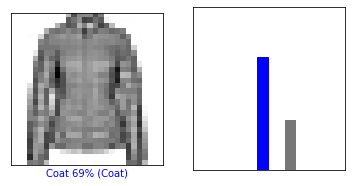

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

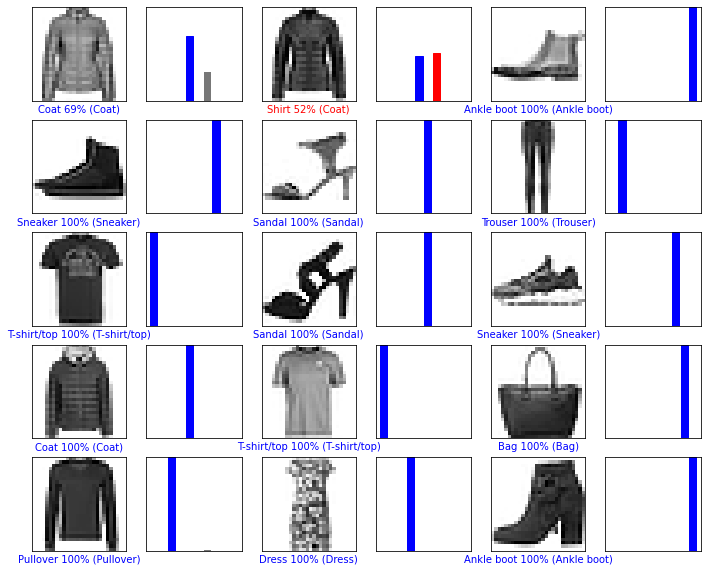

In [41]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)


In [42]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [43]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [44]:
predictions_single = model.predict(img)

print(predictions_single)

[[7.5384725e-12 3.8554043e-12 2.9423123e-05 5.3294916e-12 6.9185746e-01
  2.0582010e-12 3.0811304e-01 8.3495594e-10 2.5253249e-10 1.2113055e-07]]


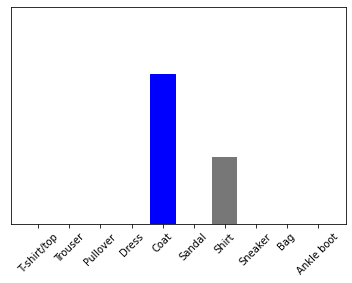

In [45]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [46]:
np.argmax(predictions_single[0])

4